<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/2_1)_%ED%99%95%EB%A5%A0%EC%A0%81_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%99%80_%ED%99%95%EB%A5%A0%EB%B3%80%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 확률적 데이터
### 1) 확률적 데이터
1. 확률적 데이터(probabilistic data) : 혈압처럼 정확히 예측할 수 없는 값이 나오는 데이터
> * 여러 조건이나 상황에 따라 데이터값이 영향을 받기 때문일 수도 있고 
> * 측정 시에 발생하는 오차 때문일 수도 있다.
2. 결정론적 데이터(deterministic data) : 생년월일처럼 언제 누가 얻더라도 항상 같은 값이 나오는 데이터

<br/>

### 2) 분포
1. 분포(distribution) : 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 정보
2. 카운트 플롯(count plot) : 분포는 범주형 데이터의 경우 시각적 표현
3. 히스토그램(histogram) : 실수형 데이터의 경우 시각적 표현

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings(action='ignore') 

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


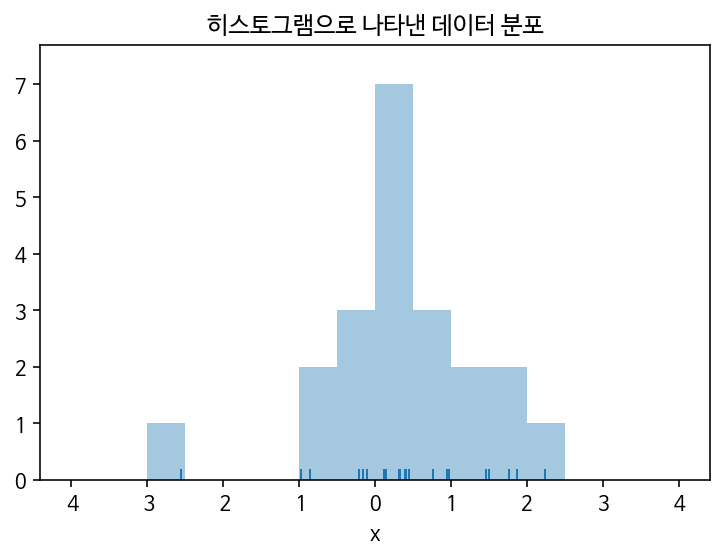

In [2]:
np.random.seed(0)
x = np.random.normal(size=21)
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

### 3) 기술통계
1. 기술통계(descriptive statistics) : 분포의 특징을 나타내는 여러가지 숫자를 계산하여 그 숫자로서 분포를 나타내는 것
> * 표본평균, 표본중앙값, 표본최빈값
> * 표본분산, 표본표준편차
> * 표본왜도, 표본첨도

2. 표본평균(sample mean, sample average) : 일반적으로 부르는 평균(mean, average). 데이터 분포의 대략적인 위치
> * $ m = \bar{x} = \dfrac{1}{N}\sum_{i=1}^{N} x_i  $   
> * $m$ = $\bar x$ = 표본평균
> * $N$는 자료의 개수, $i$는 자료의 순서(index)

3. 표본중앙값(sample median) : 전체 자료를 크기별로 정렬했을 때 가장 중앙에 위치하는 값을 말한다.
> * $N$이 홀수이면 : 중앙값은 $(N + 1)/2$번째 표본의 값
> * $N$이 짝수이면 : 중앙값은 $N/2$번째 표본의 값과 $N/2 + 1$번째 표본의 값의 평균

4. 표본최빈값((most frequent value, sample mode) : 데이터값 중 가장 빈번하게 나오는 값을 말한다.
> * 연속적인 값을 가지는 데이터에서는 똑같은 값이 나올 확률이 아주 작기 때문에 최빈값을 구하기 어렵고 의미도 없다. 
> * 연속적인 값에서는 일정한 구간 간격으로 나누어 가장 많은 데이터를 가진 구간의 대푯값을 그 데이터의 최빈값으로 가정하는 방법을 많이 사용한다. 하지만 이 방법도 구간을 어떻게 나누는가에 따라 달라질 수 있기 때문에 신뢰할 수 있는 방법이 아니다.

In [3]:
# mean() : 표본평균 계산
# median() : 표본중앙값 계산
# argmax() : 이산데이터의 최댓값 계산
# histogram() : 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산.

print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

# 연속데이터에 대한 최빈값은 의미 없는 숫자가 나오므로 구간으로 나누어 최빈구간을 구해야 한다.
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233
최빈구간 = 0.0~0.5


### 4) 단봉분포와 다봉분포
1. 단봉(uni-modal)분포 : 분포의 모양에서 봉우리가 하나
2. 다봉(multi-modal)분포 : 분포의 모양에서 봉우리가 여러개
> * 분포가 표본평균을 기준으로 대칭인 대칭(symmetric)분포이면 표본중앙값은 표본평균과 같다.
> * 분포가 대칭분포이면서 하나의 최고값만을 가지는 단봉분포이면 표본최빈값은 표본평균과 같다.
> * 대칭분포를 비대칭으로 만드는 데이터가 더해지면 표본평균이 가장 크게 영향을 받고 표본최빈값이 가장 적게 영향을 받는다.

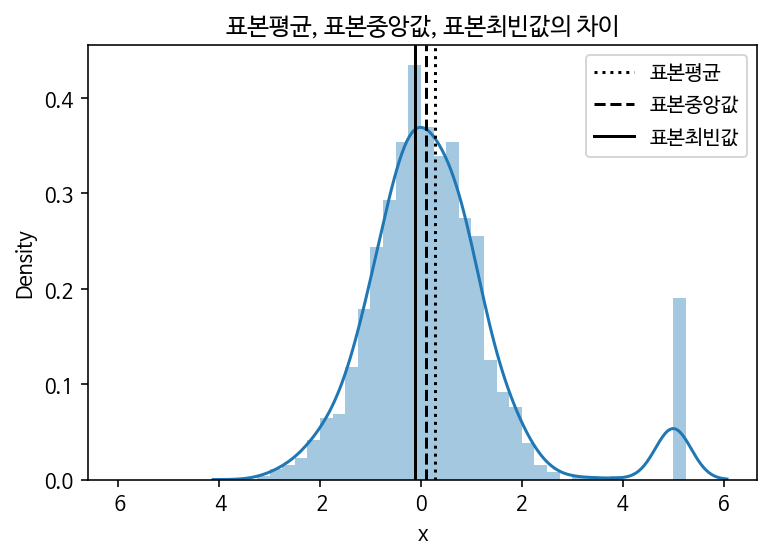

In [4]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

### 5) 분산과 표준편차
1. 표본표준편차(sample standard deviation), 표본분산(sample variance) = 데이터가 얼마나 변동(variation)하고 있는지.
2. 표본분산 : 분포의 폭(width)을 대표하는 값. 편차제곱의 평균. ($\bar{x}$ = 표본평균)
3. 표본편차 : 분산에 대한 양의 제곱근(square root) 값이다.

> * 표본분산_편향 표본분산(biased sample variance) $= s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})^2 $
> * 표본분산_비편향 표본분산(unbiased sample variance) = $ s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-\bar{x})^2 $   
> * 표준편차 = $\sqrt{\text{variance}} $ = $ s $

In [5]:
import scipy as sp

sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)  # 평균=0, 표준편차=2 인 정규분포 데이터 생성
print("* 편향 표본분산={}, 표본표준편차={}".format(np.var(x), np.std(x)))
print("* 비편향 표본분산={}, 표본표준편차={}".format(np.var(x, ddof=1), np.std(x, ddof=1)))

* 편향 표본분산=3.896937825248617, 표본표준편차=1.9740663173380515
* 비편향 표본분산=3.900838663912529, 표본표준편차=1.9750540913890255


### 6) 표본대칭도
1. 표본비대칭도(sample skewness) : 평균과의 거리의 세제곱을 이용하여 구한 특징 값
2. 표본비대칭도 = 0, 분포가 대칭
3. 표본비대칭도 < 0, 표본평균값을 기준으로 왼쪽에 있는 값을 가진 표본이 나올 가능성이 더 많다는 뜻
> * 표본비대칭도 $ = \frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}} $

<br/>

### 7) 표본첨도
1. 표본첨도(sample kurtosis) : 평균과의 거리의 네제곱을 이용하여 구한 특징값
2. 표본첨도는 데이터가 중앙에 몰려있는 정도를 정밀하게 비교하는데 쓰인다. 
3. 표본첨도의 기준은 정규분포. 정규분포 < 첨도 → 양수, 정규분포 > 첨도 → 음수
> * 표본첨도 $ = \frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3 $

In [15]:
print("* 표본대칭도 :", sp.stats.skew(x))
print("* 표본첨도 :", sp.stats.kurtosis(x))

* 표본대칭도 : 0.03385895323565712
* 표본첨도 : -0.0467663244783294


### 8) 표본모멘트(sample moment)
1. $k$차 표본모멘트(sample moment) : 분산, 비대칭도, 첨도를 구하기 위해 제곱, 세제곱, 네제곱을 하는 것처럼 $k$제곱을 이용하여 구한 모멘트
> * $k$차 표본모멘트 $= \frac{1}{N}\sum_{i = 1}^{N} x^k_i $
2. 표본중앙모멘트(sample centered moment) : 2차 표본모멘트 이상은 평균을 뺀 값
> * 표본중앙모멘트 $ = \frac{1}{N}\sum_{i = 1}^{N} (x_i - \bar{x})^k $
3. 평균은 1차 모멘트, 분산은 2차 모멘트, 비대칭도와 첨도는 3차 모멘트와 4차 모멘트에서 유도된 값이다.

In [20]:
print("표본모멘트 : ", end="")
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)
# 1차, 2차, 3차, 4차

표본모멘트 : 

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

# 2. 확률변수
### 1) 확률변수
1. 확률변수 : 수학적으로 확률공간의 표본을 입력으로 받아서 실수인 숫자로 바꾸어 출력하는 함수. 출력되는 실수가 데이터의 값이다.
2. 표본값을 굳이 실수로 바꾸는 이유는 표본이 실수가 아니면 확률분포함수를 정의할 수 없기 때문이다. 
3. 보통은 $X$ 등의 대문자 알파벳을 사용하여 확률변수를 표기한다. 확률변수에 의해 할당된 실수는 $x$와 같이 소문자 알파벳으로 표시한다. 경우에 따라서는 소문자 알파벳으로 확률변수를 표기하는 경우도 있다.
> $ X(\omega) = x $

<br/>

### 2) 이산확률변수
1. 이산확률변수(discrete random variable) : 확률변수값이 연속적(continuous)이지 않고 떨어져(discrete) 있도록 정의 가능
> $ X(\spadesuit) = 1 , \;\;
X(\heartsuit) = 2 , \;\;
X(\diamondsuit) = 3 , \;\;
X(\clubsuit) = 4 $
2. 확률공간의 표본에는 확률이 할당되어 있다. 예를 들어 모든 표본이 나올 가능성이 같다면 확률은 다음처럼 할당되어 있다는 뜻이다. 다음 식에서 $p$는 확률질량함수다.
> $ p(\spadesuit) = \dfrac{1}{4}, \;\;
p(\heartsuit) = \dfrac{1}{4}, \;\;
p(\diamondsuit) = \dfrac{1}{4}, \;\;
p(\clubsuit) = \dfrac{1}{4} $
3. 기하 분포(geometric distribution)나 포아송 분포(Poisson distribution) 등은 양의 정수값을 가지는 이산분포지만 표본의 갯수가 무한대다.
4. ex. 공정한 주사위에서 나오는 숫자는 1부터 6까지의 숫자가 나오고 균일분포 확률분포함수를 가진 이산확률변수다.

<br/>

### 3) 연속확률변수
1. 연속확률변수(continuous random variable) : 연속적이고 무한대의 실수 표본값을 가지는 확률변수.
2. 모든 표본이 실수인 숫자로 변한다면 모든 사건은 구간사건의 조합으로 표시된다. 즉, 확률이 어떻게 할당되었는가를 나타내는 정보인 확률분포를 수학적인 확률분포함수로 나타낼 수 있다는 뜻이다.
3. ex. 정상인의 최고혈압은 실수가 나오고 120 mmHg 근처에서 기댓값을 가지는 단봉분포 모양의 확률분포함수를 가진 연속확률변수다.

<br/>

### 4) 확률변수를 사용한 데이터 분석
1. 데이터를 수집한다.
2. 수집한 데이터가 어떤 확률변수의 표본 데이터라고 가정한다.
3. 데이터를 사용하여 해당 확률변수의 확률분포함수의 모양을 결정한다.(reverse-engineering)
> * 가장 중요한 파트. 기술통계 값을 이용   
 > 1) 데이터 분포가 가지는 표본평균, 표본분산 등의 기술통계값을 구한다.   
 > 2) 이 값과 같은 기술통계값을 가지는 확률분포함수를 찾는다.
4. 결정된 확률변수로부터 다음에 생성될 데이터나 데이터 특성을 예측한다.